In [2]:
# Compare appended zarr store to individual zarr stores

from pathlib import Path

import numpy as np

import xarray as xr

import uxarray as ux

import xarray as xr

import healpy as hp

import easygems.healpix as egh

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
loc = Path("/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/v2")

fils = sorted(loc.glob("*_hp8.zarr"))

# fils = [loc / "DYAMOND_diag_1h.3.75km.2020-01-20_00.00.00_to_hp4.zarr", loc / "DYAMOND_diag_1h.3.75km.2020-01-20_01.00.00_to_hp4.zarr"]

ds = xr.open_mfdataset(fils)

uxds = ux.UxDataset.from_healpix(ds)

/glade/derecho/scratch/brianpm/tmp/ipykernel_130090/680773623.py:7: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_mfdataset(fils)
/glade/derecho/scratch/brianpm/tmp/ipykernel_130090/680773623.py:7: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly 

In [4]:
data_var = 'lwupt'
uxds[data_var].isel(time=10).plot(cmap="inferno", projection=ccrs.Orthographic(), title="Remapped Data")


:Image   [Longitude,Latitude]   (Longitude_Latitude lwupt)

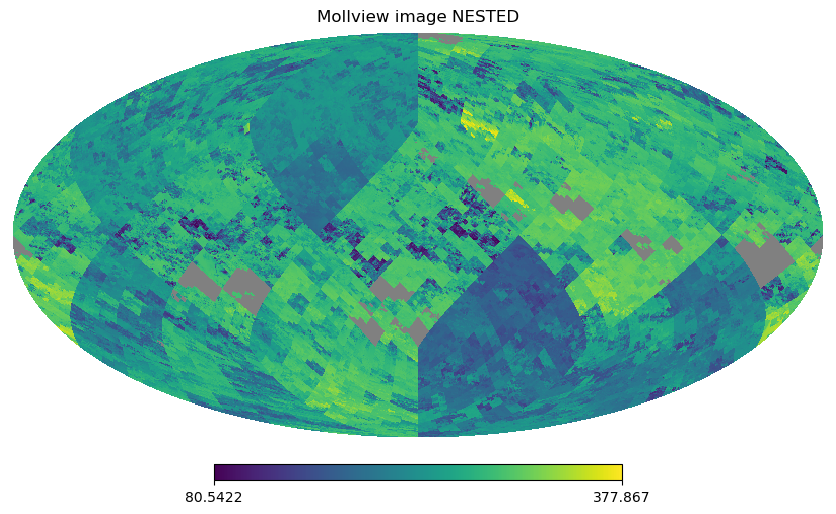

In [15]:
hp.mollview(uxds[data_var].isel(time=10), nest=True, title="Mollview image NESTED")

NameError: name 'healpix_map' is not defined

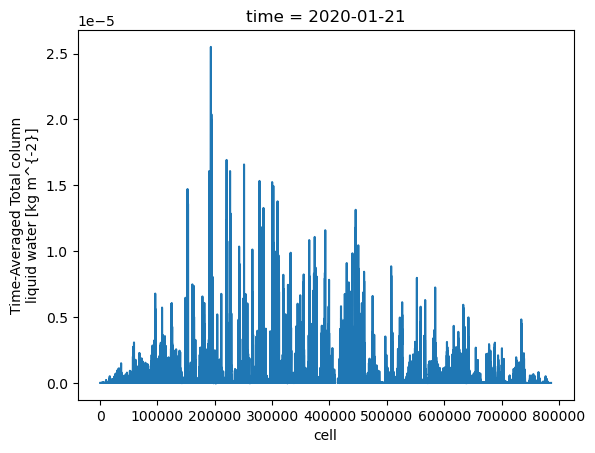

In [5]:

ds["tc_liquid_tavg"].isel(time=-1).plot()


# Visualize the map in Mollweide projection
hp.mollview(healpix_map[10,:], title='Mollweide Projection of HEALPix Data', nest=True)
hp.graticule()  # Add meridians and parallels
# plt.show()


In [ ]:
ds.data_vars

Data variables:
    swupb           (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    swupt           (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwdnbc_tavg     (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    swuptc          (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwdnb           (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwupt_tavg      (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwdnt           (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwdnb_tavg      (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    swdnt           (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    lwupb_tavg      (time, cell) float32 1MB dask.array<chunksize=(1, 12288), meta=np.ndarray>
    swupt_tavg      (time, cell) f

In [ ]:
import healpix as hp
zoom = order = 6
nside = hp.order2nside(order)
npix = hp.nside2npix(nside)
print(nside)
print(npix)

64
49152


ValueError: nside must be power of two in the NEST scheme

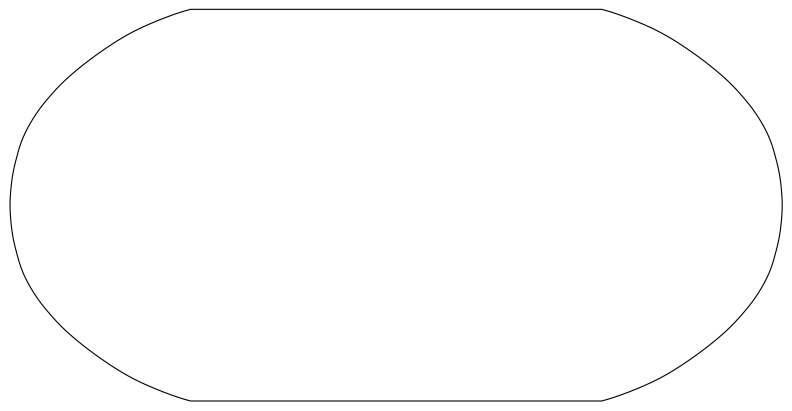

In [ ]:

projection = ccrs.Robinson(central_longitude=-135.5808361)
fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)
ax.set_global()
egh.healpix_show(ds["tc_liquid_tavg"], ax=ax)
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

In [10]:
ds_old = xr.open_dataset("/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/1hr/DYAMOND_diag_1h.3.75km.2020-03-02_11.00.00_to_hp10.zarr")
uxds_old = ux.UxDataset.from_healpix(ds_old)

data_var = 'lwupt'
uxds_old[data_var].isel(time=0).plot(cmap="inferno", projection=ccrs.Orthographic(central_longitude=170), title="Remapped Data")


/glade/derecho/scratch/brianpm/tmp/ipykernel_130090/1392230047.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds_old = xr.open_dataset("/glade/derecho/scratch/digital-earths-hackathon/mpas_DYAMOND3/1hr/DYAMOND_diag_1h.3.75km.2020-03-02_11.00.00_to_hp10.zarr")


:Image   [Longitude,Latitude]   (Longitude_Latitude lwupt)

In [7]:
ds_old

<xarray.Dataset> Size: 88MB
Dimensions:         (time: 1, cell: 786432)
Coordinates:
  * time            (time) datetime64[ns] 8B 2020-03-02T11:00:00
Dimensions without coordinates: cell
Data variables: (12/29)
    lwupt           (time, cell) float32 3MB ...
    swupb           (time, cell) float32 3MB ...
    tc_liquid_tavg  (time, cell) float32 3MB ...
    swupb_tavg      (time, cell) float32 3MB ...
    swdnt           (time, cell) float32 3MB ...
    lwdnb_tavg      (time, cell) float32 3MB ...
    ...              ...
    crs             int64 8B ...
    lwdnbc          (time, cell) float32 3MB ...
    lwuptc          (time, cell) float32 3MB ...
    tc_liquid       (time, cell) float32 3MB ...
    lwupbc          (time, cell) float32 3MB ...
    swuptc_tavg     (time, cell) float32 3MB ...
Attributes: (12/126)
    model_name:                             mpas
    core_name:                              atmosphere
    source:                                 MPAS
    Conventions:                            MPAS
    git_version:                            v8.0.1-84-g4df8dd2c-dirty
    on_a_sphere:                            YES
    ...                                     ...
    config_oml1d:                           NO
    config_oml_hml0:                        30.0
    config_oml_gamma:                       0.14000000059604645
    config_oml_relaxation_time:             864000.0
    config_sounding_interval:               none
    file_id:                                4d1k3qmhdn